In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("playstore-analysis.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 1. Data clean up – Missing value treatment
a. Drop records where rating is missing since rating is our target/study variable
b. Check the null values for the Android Ver column.
i. Are all 3 records having the same problem?
ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
iii. Replace remaining missing values with the mode
c. Current ver – replace with most common value

In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7700.0,100+,Free,0,Teen,Social,"February 2, 2018",1,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9800.0,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9600.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [5]:
df.dropna(how='any',subset =['Rating'],inplace=True)

In [7]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


i.All 3 types of version are having same problem

In [8]:
df.drop([10472],inplace = True)

In [9]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [10]:
df['Android Ver'].fillna(value = df['Android Ver'].mode()[0],inplace = True)

In [11]:
df['Current Ver'].fillna(value =df['Current Ver'].mode()[0],inplace = True)

# 2. Data clean up – correcting the data types
a. Which all variables need to be brought to numeric types?
b. Price variable – remove $ sign and convert to float
c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
d. Convert all other identified columns to numeric

a)reviews and installs need to be bought to numeric values

In [12]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] =pd.to_numeric(df['Price'],downcast = 'float')

In [13]:
#to check
df['Price'][300]

0.0

In [14]:
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs']= df['Installs'].astype('int')
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32

In [15]:
df['Reviews']=df['Reviews'].astype("int")

# 3. Sanity checks – check for the following and handle accordingly
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.
i. Are there any such records? Drop if so.
b. Reviews should not be more than installs as only those who installed can review the
app.
i. Are there any such records? Drop if so.

In [16]:
df.loc[df.Rating < 1]  & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no such records has which are less then 1 and grerter then 5

In [17]:
df.loc[df['Reviews'] >df['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


Yes there are such 7 records

In [19]:
gt = df.loc[df['Reviews'] >df['Installs']].index
gt


Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [20]:
df.drop(labels = gt,inplace = True)

In [21]:
df.loc[df['Reviews'] >df['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4. Identify and handle outliers –
a. Price column

i. Make suitable plot to identify outliers in price
ii. Do you expect apps on the play store to cost $200? Check out these cases
iii. After dropping the useless records, make the suitable plot again to identify
outliers
iv. Limit data to records with price < $30

b. Reviews column
i. Make suitable plot
ii. Limit data to apps with < 1 Million reviews
c. Installs
i. What is the 95th percentile of the installs?
ii. Drop records having a value more than the 95th percentile

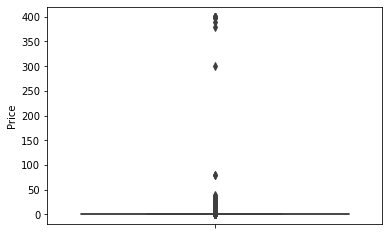

In [23]:
sns.boxplot(df['Price'],orient ='v');


In [24]:
df.Price[df['Price']>200].count()
print("YES we can except price to be greater then 200$ =",df.Price[df['Price']>200].count(),'apps')

YES we can except price to be greater then 200$ = 15 apps


In [25]:
df.drop(df[df['Price']>30].index,inplace=True)


In [26]:
df[df['Price']>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


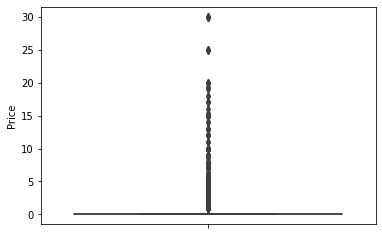

In [27]:

sns.boxplot(df['Price'],orient='v');

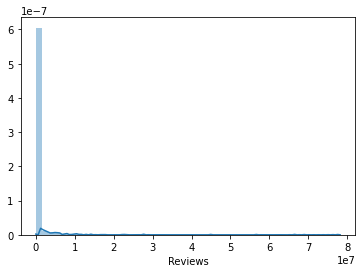

In [28]:
sns.distplot(df['Reviews']);



In [29]:
df1 = df[df['Reviews']>1000000].index

In [30]:
df1 = df[df['Reviews']>1000000].index
df.drop(labels = df1,inplace = True)
print(df1.value_counts().sum())

704


704 collumns droped

In [31]:


percentile = df.Installs.quantile(q = 0.95)
print(percentile,"is 95th percentile")

10000000.0 is 95th percentile


In [32]:
df2= df[df['Installs']>percentile].index
df.drop(df2,inplace = True)

In [33]:
df2.value_counts().sum()

199

199 values dropped greater then 95th percentile

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?
a. How do you explain this?
b. What is the implication of this on your analysis?/

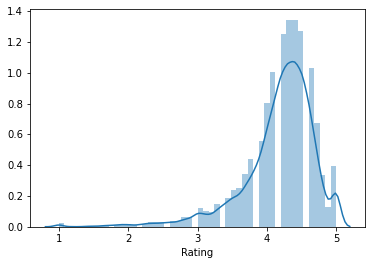

In [34]:
sns.distplot(df["Rating"]);

In [35]:
skewness = df["Rating"].skew()
print("Skewness of Rating distrbution is ",skewness)

Skewness of Rating distrbution is  -1.7434270330647985


Since value is negative and tail is on negative side it is negatively skewed

In [37]:
mode =df["Rating"].mode()
mean =df["Rating"].mean()
median = df["Rating"].median()
print('mode =',mode)

print(  'mean=',mean)
print( 'median =',median)

mode = 0    4.3
dtype: float64
mean= 4.170800237107298
median = 4.3


Since mode >mean <median the distribution of Rating is Negatively Skewed and it is skewed towards lower values

# 6. What are the top Content Rating values?
a. Are there any values with very few records?
b. If yes, drop those as they won’t help in the analysis

In [38]:
df["Content Rating"].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

yes Adults only 18+ and  Unrated have very few records

In [39]:
df['Content Rating'].replace("Adults only 18+",'nan',inplace = True)

df['Content Rating'].replace("Unrated",'nan',inplace = True)
df["Content Rating"].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
nan                4
Name: Content Rating, dtype: int64

In [40]:
df3 = df[df["Content Rating"] == "nan"].index
 

In [41]:
df.drop(df3,inplace = True)


In [42]:
df["Content Rating"].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# 7. Effect of size on rating
a. Make a joinplot to understand the effect of size on rating
b. Do you see any patterns?
c. How do you explain the pattern?

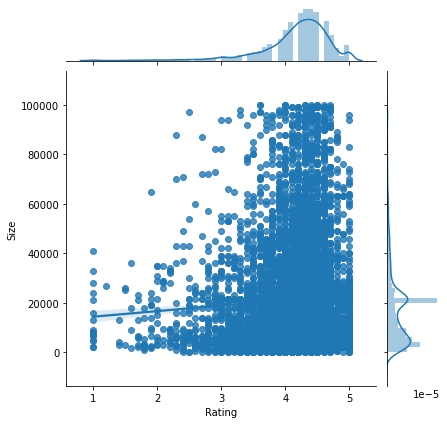

In [43]:
sns.jointplot(df['Rating'],df['Size'],data = df,kind='reg');

b)Yes,there is a corelation between Rating and Size

c)we can see on increasing Rating size also increases ,but there is constant values at some point .
IT is a positive correlation between size and rating

# 8. Effect of price on rating
a. Make a jointplot (with regression line)

b. What pattern do you see?

c. How do you explain the pattern?

d. Replot the data, this time with only records with price > 0

e. Does the pattern change?

f. What is your overall inference on the effect of price on the rating

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


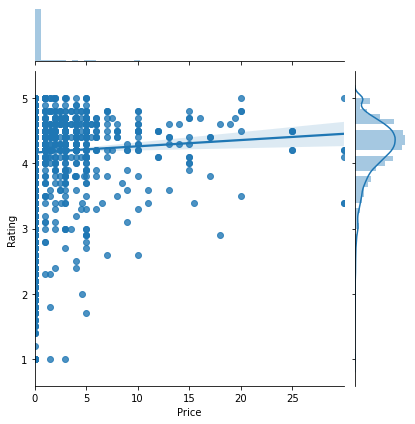

In [44]:
sns.jointplot(df['Price'],df['Rating'],kind ="reg");

A very weak positive relation

As price increases the rating are increasingly slightly but are constant so a very weak postive relation can be seen


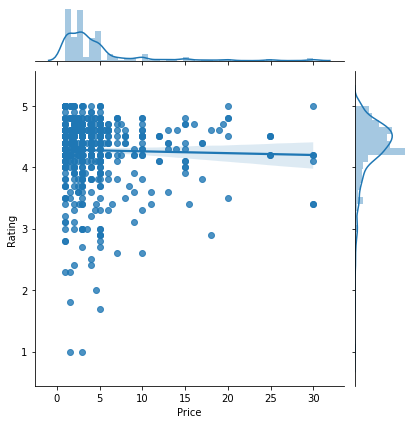

In [46]:
GP = df.loc[df.Price>0]
sns.jointplot(x ="Price",y = 'Rating',kind ="reg",data = GP);

e)YEs,pattern changed for price > 0 which is very weak negative corelation 

f)So has we increase price their is no significant change to  rating ,which is almost constant that is to 4

# 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

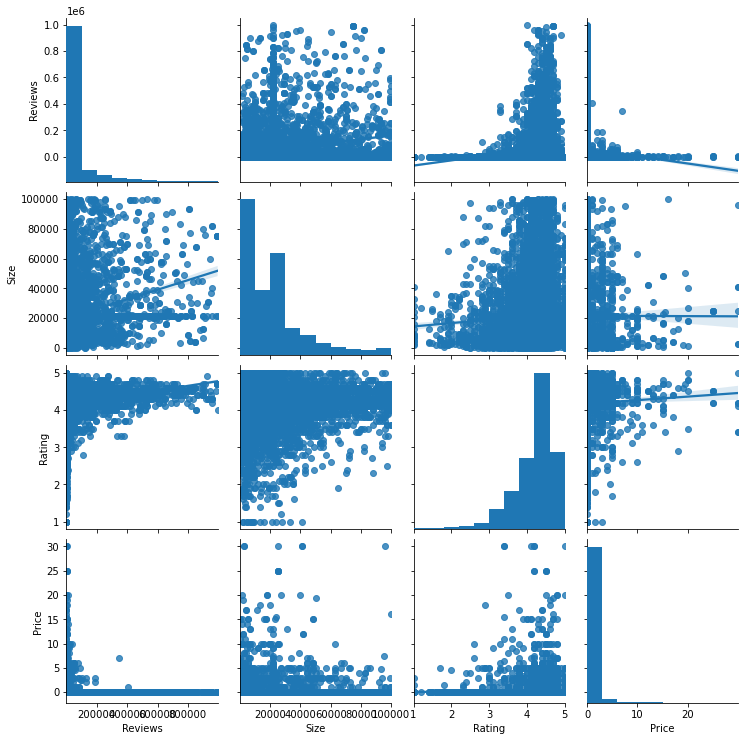

In [47]:
sns.pairplot(df,vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg');

# 10. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating

b. Which metric would you use? Mean? Median? Some other quantile?

c. Choose the right metric and plot

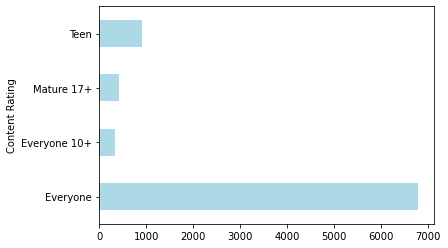

In [48]:
df.groupby(['Content Rating'])['Rating'].count().plot.barh(color="lightblue")
plt.show()

b)
We should use median for any outliers to be removed

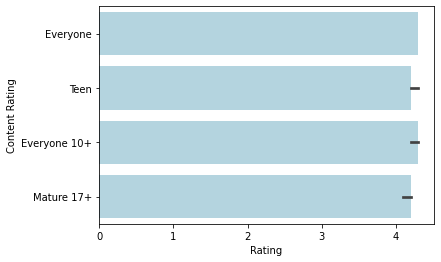

In [49]:
sns.barplot(x = 'Rating',y = 'Content Rating',data = df,estimator = np.median,color = 'lightblue');

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

c. Make a heatmap of this

i. Annotated
ii. Greens color map

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [51]:
bins =[0,20000,40000,60000,80000,100000]
df['Bucket Size'] =pd.cut(df["Size"],bins,labels =['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'] )
pd.pivot_table(df,index ="Bucket Size",columns = 'Content Rating',values = 'Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [52]:
quan = pd.pivot_table(df,index ="Bucket Size",columns = 'Content Rating',values = 'Rating',aggfunc = lambda x: np.quantile(x,0.2))
quan

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


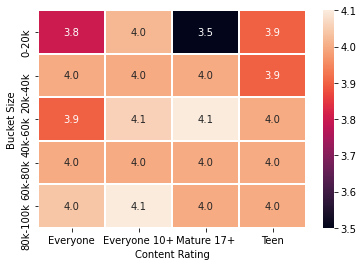

In [53]:
sns.heatmap(quan,annot = True,linewidth = 0.8,fmt = '.1f');

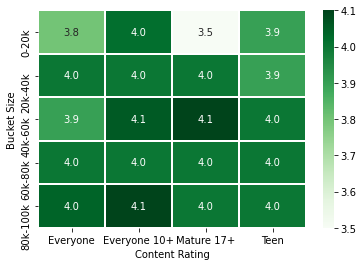

In [54]:
sns.heatmap(quan,annot = True,linewidth = 0.8,fmt = '.1f',cmap = 'Greens');

d)
based on anyalsis heavier apps are prefferd then lighter apps ,because u can clearly see apps with  size range 40k -60k and 80k-100k have higher ratings then lower size apps